### PROJECT : Rating Product & Sorting Reviews in Amazon

#### _BUSINESS PROBLEM_ 
One of the most important problems in e-commerce is the correct calculation of the points given to the products after sales.<br/>
The solution to this problem means providing greater customer satisfaction for the e-commerce site, prominence of the product for the sellers and a seamless shopping experience for the buyers.<br/>
Another problem is the correct ordering of the comments given to the products. Since misleading comments will directly affect the sale of the product, it will cause both financial loss and loss of customers. In the solution of these 2 basic problems, while the e-commerce site and the sellers will increase their sales, the customers will complete the purchasing journey without any problems.
***
#### _The Story of Dataset_
This data set, which includes Amazon product data, includes product categories and various metadata.<br/>
The product with the most comments in the electronics category has user ratings and comments.
***
reviewerID: User number <br/>
asin: Product number<br/>
reviewerName: User name<br/>
helpful: Useful rating<br/>
reviewText: Evaluation<br/>
overall: Product rating<br/>
summary: The summary of evaluation<br/>
unixReviewTime: Evaluation time<br/>
reviewTime: Evaluation time Raw<br/>
day_diff: The number of days since evaluation<br/>
helpful_yes: The number of useful evaluation<br/>
total_vote: The number of votes given to evaluation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

### _1.Read the csv file and calculate the average product score_

In [9]:
df = pd.read_csv("../datasets/amazon_review.csv")

In [10]:
def check_df(dataframe, head=5):
    print("INFO".center(70,'='))
    print(dataframe.info())

    print("SHAPE".center(70,'='))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))

    print("TYPES".center(70,'='))
    print(dataframe.dtypes)

    print("HEAD".center(70, '='))
    print(dataframe.head(head))

    print("TAIL".center(70,'='))
    print(dataframe.tail(head))

    print("NULL".center(70,'='))
    print(dataframe.isnull().sum())

    print("QUANTILES".center(70,'='))
    print(dataframe.describe().T)

check_df(df)

=================================INFO=================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB
None
================================SHAPE=================================
Rows: 4915
Columns: 12
=============================

In [12]:
df["asin"].nunique() # Dataset has one product

1

In [13]:
df["overall"].value_counts()

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

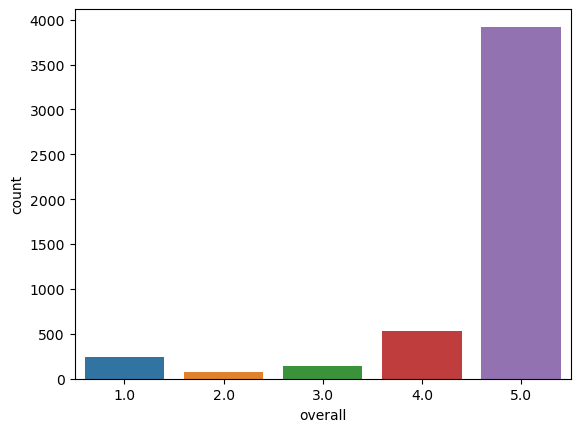

In [14]:
sns.countplot(x="overall", data=df)
plt.show(block=True)

#### _Calculate the weighted average score by date_

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4915.0,4.587589e+00,9.968451e-01,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,4915.0,1.379465e+09,1.581857e+07,1.339200e+09,1.365898e+09,1.381277e+09,1.392163e+09,1.406074e+09
day_diff,4915.0,4.373670e+02,2.094399e+02,1.000000e+00,2.810000e+02,4.310000e+02,6.010000e+02,1.064000e+03
helpful_yes,4915.0,1.311089e+00,4.161916e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.952000e+03
total_vote,4915.0,1.521465e+00,4.412309e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03


In [16]:
df["day_diff"].mean()

437.3670396744659

In [17]:
df["day_diff"].max()

1064

In [18]:
df["day_diff"].min()

1

In [25]:
def time_weighted_avg(dataframe,w1=30, w2=28, w3=22, w4=20):
    return dataframe.loc[dataframe["day_diff"] <= 30, "overall"].mean() * w1 / 100 + \
           dataframe.loc[((dataframe["day_diff"] > 30) & (
                       dataframe["day_diff"] <= 90)), "overall"].mean() * w2 / 100 + \
           dataframe.loc[((dataframe["day_diff"] > 90) & (
                       dataframe["day_diff"] <= 180)), "overall"].mean() * w3 / 100 + \
           dataframe.loc[dataframe["day_diff"] > 180, "overall"].mean() * w4 / 100

In [26]:
time_weighted_avg(df)

4.705170425865283

In [27]:
df["overall"].mean() # The result when mean is calculated directly

4.587589013224822

In [28]:
time_weighted_avg(df, w1=28, w2=26, w3=24, w4=22)

4.6987161061560725

In [29]:
df.loc[df["day_diff"] <= 30, "overall"].count()

66

In [30]:
df.loc[((df["day_diff"] > 30) & (df["day_diff"] <= 90)), "overall"].count()

127

In [31]:
df.loc[((df["day_diff"] > 90) & (df["day_diff"] <= 180)), "overall"].count()

388

In [32]:
df.loc[df["day_diff"] > 180, "overall"].count()

4334

### _2. Determine 20 Reviews for the product_

In [33]:
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]

df[["total_vote", "helpful_yes", "helpful_no"]].head(10)

,total_vote,helpful_yes,helpful_no
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,1,1,0
9,0,0,0


#### Calculate score_pos_neg_diff, score_average_rating ve wilson_lower_bound scores and add to dataframe

In [34]:
def score_pos_neg_diff(pos, neg):
    return pos - neg

In [35]:
def score_average_rating(pos, neg):
    if (pos + neg) == 0:
        return 0
    return pos / (pos + neg)

In [36]:
def wilson_lower_bound(pos, neg, confidence=0.95):
    n = pos + neg
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = (1.0 * pos) / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)


In [37]:
df["score_pos_neg_diff"] = df.apply(lambda x: score_pos_neg_diff(x["helpful_yes"], x["helpful_no"]), axis= 1)
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"], x["helpful_no"]), axis= 1)
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis= 1)

In [38]:
df[["helpful_yes", "total_vote", "helpful_no", "score_pos_neg_diff", "score_average_rating", "wilson_lower_bound"]].head(10)

,helpful_yes,total_vote,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0,0,0,0.0,0.000000
1,0,0,0,0,0.0,0.000000
2,0,0,0,0,0.0,0.000000
3,0,0,0,0,0.0,0.000000
4,0,0,0,0,0.0,0.000000
5,0,0,0,0,0.0,0.000000
6,0,0,0,0,0.0,0.000000
7,0,0,0,0,0.0,0.000000
8,1,1,0,1,1.0,0.206549
9,0,0,0,0,0.0,0.000000


### _3. Determine top 20 reviews according to wilson lower bound score_

In [39]:
df.sort_values("wilson_lower_bound",ascending=False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.0,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,68,1884,0.966337,0.957544
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.0,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,77,1351,0.948837,0.936519
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.0,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,126,1442,0.925620,0.912139
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.0,"Warning, read this!",1346544000,2012-02-09,1033,422,495,73,349,0.852525,0.818577
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.0,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,4,41,0.918367,0.808109
1835,A1J6VSUM80UAF8,B007WTAJTO,goconfigure,"[60, 68]",Bought from BestBuy online the day it was anno...,5.0,I own it,1393545600,2014-02-28,283,60,68,8,52,0.882353,0.784651
3981,A1K91XXQ6ZEBQR,B007WTAJTO,"R. Sutton, Jr. ""RWSynergy""","[112, 139]",The last few days I have been diligently shopp...,5.0,"Resolving confusion between ""Mobile Ultra"" and...",1350864000,2012-10-22,777,112,139,27,85,0.805755,0.732136
3807,AFGRMORWY2QNX,B007WTAJTO,R. Heisler,"[22, 25]",I bought this card to replace a lost 16 gig in...,3.0,"Good buy for the money but wait, I had an issue!",1361923200,2013-02-27,649,22,25,3,19,0.880000,0.700442
4306,AOHXKM5URSKAB,B007WTAJTO,Stellar Eller,"[51, 65]","While I got this card as a ""deal of the day"" o...",5.0,Awesome Card!,1339200000,2012-09-06,823,51,65,14,37,0.784615,0.670334
4596,A1WTQUOQ4WG9AI,B007WTAJTO,"Tom Henriksen ""Doggy Diner""","[82, 109]",Hi:I ordered two card and they arrived the nex...,1.0,Designed incompatibility/Don't support SanDisk,1348272000,2012-09-22,807,82,109,27,55,0.752294,0.663595
